# Count based word Representation

머신 러닝 등의 알고리즘이 적용된 본격적인 자연어 처리를 위해서는 문자를 숫자로 수치화할 필요가 있다. 따라서 문자를 숫자로 수치화하는 방법에 대해서 알아보고자 한다.

그 전에 다양한 단어의 표현 방법에는 어떤 것이 있는지 알아보자.

## 1. 단어의 표현 방법

단어의 표현 방법은 크게 국소 표현(Local Representation) 방법과 분산 표현(Distributed Representation) 방법으로 나뉜다. 

국소 표현 방법 : 해당 단어 그 자체만 보고, 특정값을 맵핑하여 단어를 표현하는 방법

분산 표현 방법 : 그 단어를 표현하고자 주변을 참고하는 방법

예를 들어 puppy(강아지), cute(귀여운), lovely(사랑스러운)라는 단어가 있을 때 각 단어에 1번, 2번, 3번 등과 같은 숫자를 맵핑(mapping)하여 부여한다면 이는 국소 표현 방법에 해당된다. 

반면, 분산 표현 방법의 예를 하나 들어보면 해당 단어를 표현하기 위해 주변 단어를 참고한다. puppy(강아지)라는 단어 근처에는 주로 cute(귀여운), lovely(사랑스러운)이라는 단어가 자주 등장하므로, puppy라는 단어는 cute, lovely한 느낌이다로 단어를 정의한다. 

이렇게 되면 이 두 방법의 차이는 국소 표현 방법은 단어의 의미, 뉘앙스를 표현할 수 없지만, 분산 표현 방법은 단어의 뉘앙스를 표현할 수 있게 된다.

## 2. 단어 표현의 카테고리화

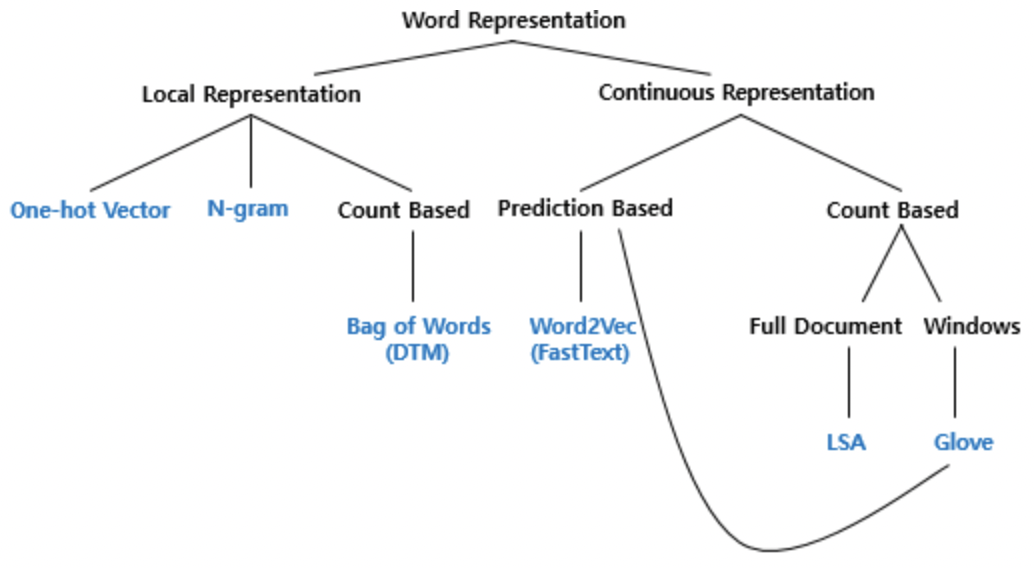

Bag of Words는 국소 표현에(Local Representation)에 속하며, 단어의 빈도수를 카운트(Count)하여 단어를 수치화하는 단어 표현 방법이다. 

이 시간에는 BoW와 그의 확장인 DTM(또는 TDM)에 대해서 학습하고, 이러한 빈도수 기반 단어 표현에 단어의 중요도에 따른 가중치를 줄 수 있는 TF-IDF에 대해서 알아보자.

# Bag of Words (BoW)

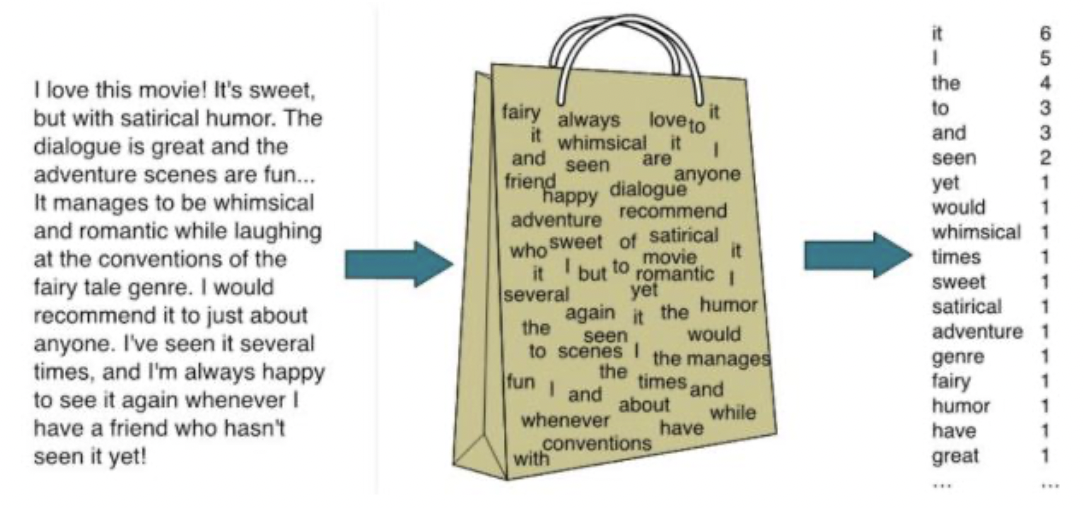



## 1. Bag of Words ?

Bag of Words란 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법이다. 

BoW를 만드는 과정을 이렇게 두 가지 과정으로 생각해보자.

(1) 우선, 각 단어에 고유한 정수 인덱스를 부여한다.

(2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만든다.

In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 6.6 MB/s 
     |████████████████████████████████| 448 kB 45.2 MB/s 
     |████████████████████████████████| 86 kB 4.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from konlpy.tag import Okt
import re  
okt=Okt()  

token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")  
token=okt.morphs(token)  

word2index={}  
bow=[]  
for voca in token:  
         if voca not in word2index.keys():  
             word2index[voca]=len(word2index)  
             bow.insert(len(word2index)-1,1) 
         else:
            index=word2index.get(voca)
            bow[index]=bow[index]+1

print(word2index)  

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [ ]:
bow

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]

## 2. CountVectorizer 클래스로 BoW 만들기

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df = 1, ngram_range = (1,1))

corpus = ['The proposed rising was a dismal failure, but the Habeas Corpus Act was suspended and Thistlewood and Watson were seized, although upon being tried they were acquitted.', 
          'Before the prorogation, however, he saw the invaluable Act of Habeas Corpus, which he had carried through parliament, receive the royal assent.', 
          'These Personal Liberty Laws forbade justices and judges to take cognizance of claims, extended the habeas corpus act and the privilege of jury trial to fugitives, and punished false testimony severely.', 
          'The procession of the Host on Corpus Christi day became, as it were, a public demonstration of Catholic orthodoxy against Protestantism and later against religious Liberalism.']

features = vectorizer.fit_transform(corpus) 
print(features)

  (0, 61)	2
  (0, 46)	1
  (0, 53)	1
  (0, 70)	2
  (0, 19)	1
  (0, 21)	1
  (0, 10)	1
  (0, 25)	1
  (0, 16)	1
  (0, 1)	1
  (0, 58)	1
  (0, 4)	2
  (0, 64)	1
  (0, 71)	1
  (0, 72)	2
  (0, 56)	1
  (0, 3)	1
  (0, 69)	1
  (0, 9)	1
  (0, 68)	1
  (0, 63)	1
  (0, 0)	1
  (1, 61)	3
  (1, 25)	1
  (1, 16)	1
  :	:
  (2, 22)	1
  (2, 60)	1
  (2, 57)	1
  (3, 61)	2
  (3, 16)	1
  (3, 4)	1
  (3, 72)	1
  (3, 39)	2
  (3, 45)	1
  (3, 28)	1
  (3, 40)	1
  (3, 13)	1
  (3, 17)	1
  (3, 7)	1
  (3, 5)	1
  (3, 31)	1
  (3, 49)	1
  (3, 18)	1
  (3, 12)	1
  (3, 41)	1
  (3, 2)	2
  (3, 48)	1
  (3, 35)	1
  (3, 52)	1
  (3, 37)	1


In [ ]:
features.shape

(4, 74)

In [ ]:
vocab = vectorizer.get_feature_names() 
print(len(vocab)) 
vocab[:15]

74


['acquitted',
 'act',
 'against',
 'although',
 'and',
 'as',
 'assent',
 'became',
 'before',
 'being',
 'but',
 'carried',
 'catholic',
 'christi',
 'claims']

In [ ]:
pd.DataFrame(features.toarray(), columns = vocab).head()

,acquitted,act,against,although,and,as,assent,became,before,being,but,carried,catholic,christi,claims,cognizance,corpus,day,demonstration,dismal,extended,failure,false,forbade,fugitives,habeas,had,he,host,however,invaluable,it,judges,jury,justices,later,laws,liberalism,liberty,of,on,orthodoxy,parliament,personal,privilege,procession,proposed,prorogation,protestantism,public,punished,receive,religious,rising,royal,saw,seized,severely,suspended,take,testimony,the,these,they,thistlewood,through,to,trial,tried,upon,was,watson,were,which
0,1,1,0,1,2,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,2,0,1,1,0,0,0,1,1,2,1,2,0
1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,2,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,1
2,0,1,0,0,3,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,1,0,1,2,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,2,1,0,0,0,2,1,0,0,0,0,0,0
3,0,0,2,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,2,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0


## 3. 불용어를 제거한 BoW 만들기

### (1) 사용자가 직접 정의한 불용어 사용

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


### (2) CountVectorizer에서 제공하는 자체 불용어 사용

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}


### (3) NLTK에서 지원하는 불용어 사용

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

text=["Family is not an important thing. It's everything."]
sw = stopwords.words("english")
vect = CountVectorizer(stop_words =sw)
print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


# Document-Term Matrix (DTM)

서로 다른 문서들의 BoW들을 결합한 표현 방법인 문서 단어 행렬(Document-Term Matrix, DTM) 표현 방법을 알아보자. 

행과 열을 반대로 선택하면 TDM이라고 부르기도 한다. 이렇게 하면 서로 다른 문서들을 비교할 수 있다.

## DTM 표기법

문서 단어 행렬(Document-Term Matrix, DTM)이란 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것을 말한다. 

쉽게 생각하면 각 문서에 대한 BoW를 하나의 행렬로 만든 것으로 생각할 수 있으며, BoW와 다른 표현 방법이 아니라 BoW 표현을 다수의 문서에 대해서 행렬로 표현하고 부르는 용어다.

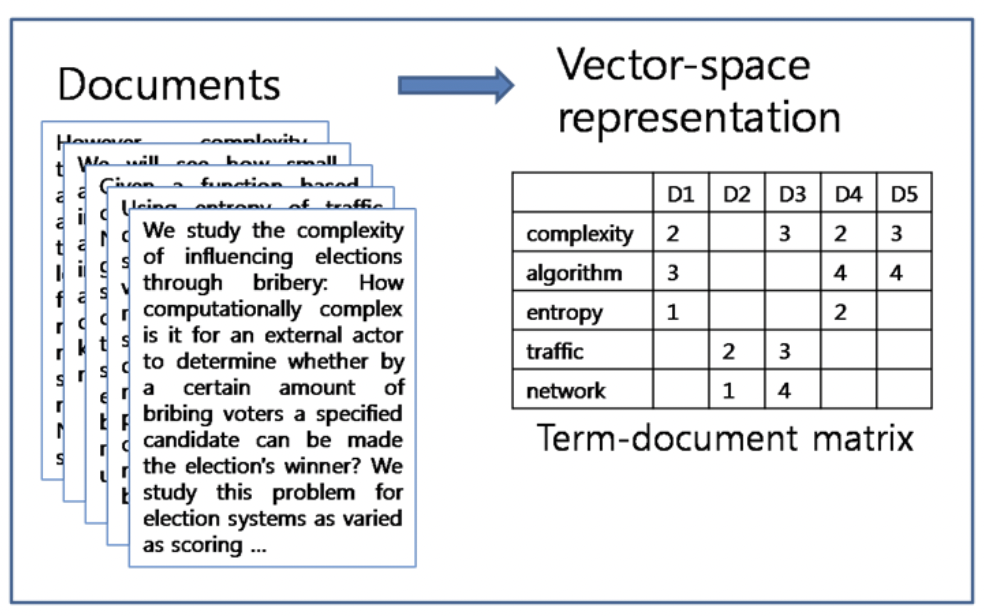

## DTM 한계점

### (1) 희소 표현 Sparse Representation
### (2) 단순 빈도 수 기반의 접근

# TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF(Term Frequency-Inverse Document Frequency)는 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법이다. 사용 방법은 우선 DTM을 만든 후, TF-IDF 가중치를 부여한다.

TF-IDF는 주로 문서의 유사도를 구하는 작업, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰인다.

TF(단어 빈도, term frequency)는 특정한 단어가 문서 내에 얼마나 자주 등장하는지를 나타내는 값으로, 이 값이 높을수록 문서에서 중요하다고 생각할 수 있다. 하지만 단어 자체가 문서군 내에서 자주 사용 되는 경우, 이것은 그 단어가 흔하게 등장한다는 것을 의미한다. 

이것을 DF(문서 빈도, document frequency)라고 하며, 이 값의 역수를 IDF(역문서 빈도, inverse document frequency)라고 한다. 

TF-IDF는 TF와 IDF를 곱한 값이다.

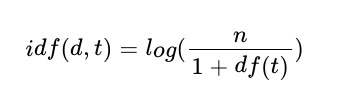

In [ ]:
import pandas as pd 
from math import log 

In [ ]:
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [ ]:
N = len(docs) 

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

In [ ]:
result = []
for i in range(N): 
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [ ]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [ ]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


# 사이킷런을 이용한 DTM과 TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) 
print(vector.vocabulary_) 

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


## 실습

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
text = ['I go to my home my home is very large', 
        'I went out my home I go to the market',
        'I bought a yellow lemon I go back to home'] 
        
tfidf_vectorizer = TfidfVectorizer() 

In [ ]:
tfidf_vectorizer.fit(text)  
tfidf_vectorizer.vocabulary_ 
sorted(tfidf_vectorizer.vocabulary_.items()) 

[('back', 0),
 ('bought', 1),
 ('go', 2),
 ('home', 3),
 ('is', 4),
 ('large', 5),
 ('lemon', 6),
 ('market', 7),
 ('my', 8),
 ('out', 9),
 ('the', 10),
 ('to', 11),
 ('very', 12),
 ('went', 13),
 ('yellow', 14)]

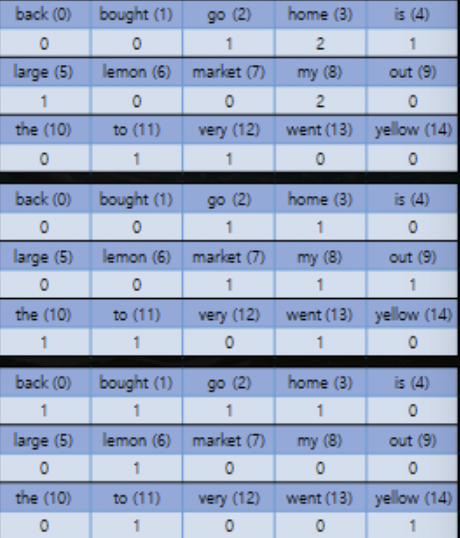

In [ ]:
tfidf_vectorizer.idf_

array([1.69314718, 1.69314718, 1.        , 1.        , 1.69314718,
       1.69314718, 1.69314718, 1.69314718, 1.28768207, 1.69314718,
       1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718])

In [ ]:
tfidf_vectorizer.idf_.shape

(15,)

In [ ]:
tfidf_vectorizer.transform(text).toarray()

array([[0.        , 0.        , 0.2170186 , 0.4340372 , 0.36744443,
        0.36744443, 0.        , 0.        , 0.55890191, 0.        ,
        0.        , 0.2170186 , 0.36744443, 0.        , 0.        ],
       [0.        , 0.        , 0.24902824, 0.24902824, 0.        ,
        0.        , 0.        , 0.42164146, 0.3206692 , 0.42164146,
        0.42164146, 0.24902824, 0.        , 0.42164146, 0.        ],
       [0.44514923, 0.44514923, 0.26291231, 0.26291231, 0.        ,
        0.        , 0.44514923, 0.        , 0.        , 0.        ,
        0.        , 0.26291231, 0.        , 0.        , 0.44514923]])

### IDF 벡터화 - DF 구하기

In [ ]:
import numpy as np 
DF_vec = np.array([1, 1, 3, 3, 1, 
                   1, 1, 1, 2, 1, 
                   1, 3, 1, 1, 1])

In [ ]:
def idf_func(n, df): 
  rst = np.log((1+n)/(1+df)) + 1 
  return rst

In [ ]:
idf_func(3, DF_vec)

array([1.69314718, 1.69314718, 1.        , 1.        , 1.69314718,
       1.69314718, 1.69314718, 1.69314718, 1.28768207, 1.69314718,
       1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718])

In [ ]:
tfidf_vectorizer.idf_

array([1.69314718, 1.69314718, 1.        , 1.        , 1.69314718,
       1.69314718, 1.69314718, 1.69314718, 1.28768207, 1.69314718,
       1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718])

### TF-IDF 벡터화 - L2 정규화

In [ ]:
tfidf_vectorizer.transform(text).toarray()

array([[0.        , 0.        , 0.2170186 , 0.4340372 , 0.36744443,
        0.36744443, 0.        , 0.        , 0.55890191, 0.        ,
        0.        , 0.2170186 , 0.36744443, 0.        , 0.        ],
       [0.        , 0.        , 0.24902824, 0.24902824, 0.        ,
        0.        , 0.        , 0.42164146, 0.3206692 , 0.42164146,
        0.42164146, 0.24902824, 0.        , 0.42164146, 0.        ],
       [0.44514923, 0.44514923, 0.26291231, 0.26291231, 0.        ,
        0.        , 0.44514923, 0.        , 0.        , 0.        ,
        0.        , 0.26291231, 0.        , 0.        , 0.44514923]])

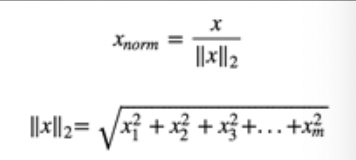

In [ ]:
tfidf_vectorizer.transform(text).toarray()[0]

array([0.        , 0.        , 0.2170186 , 0.4340372 , 0.36744443,
       0.36744443, 0.        , 0.        , 0.55890191, 0.        ,
       0.        , 0.2170186 , 0.36744443, 0.        , 0.        ])

In [ ]:
count_vec = np.array([0, 0, 1, 2, 1, 
                      1, 0, 0, 2, 0, 
                      0, 1, 1, 0, 0])

In [ ]:
tfidf_vectorizer.idf_

array([1.69314718, 1.69314718, 1.        , 1.        , 1.69314718,
       1.69314718, 1.69314718, 1.69314718, 1.28768207, 1.69314718,
       1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718])

In [ ]:
np.multiply(count_vec, tfidf_vectorizer.idf_)

array([0.        , 0.        , 1.        , 2.        , 1.69314718,
       1.69314718, 0.        , 0.        , 2.57536414, 0.        ,
       0.        , 1.        , 1.69314718, 0.        , 0.        ])

### L2 normalize

In [ ]:
from sklearn import preprocessing 

tf_idf_before_l2 = np.multiply(count_vec, tfidf_vectorizer.idf_) 
tf_idf_before_l2 = tf_idf_before_l2.reshape(1, -1) 
tf_idf_after_l2 = preprocessing.normalize(tf_idf_before_l2, norm='l2')

In [ ]:
tf_idf_after_l2

array([[0.        , 0.        , 0.2170186 , 0.4340372 , 0.36744443,
        0.36744443, 0.        , 0.        , 0.55890191, 0.        ,
        0.        , 0.2170186 , 0.36744443, 0.        , 0.        ]])